In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

import seaborn as sns
np.set_printoptions(suppress=True)

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [3]:
df = data.sf_temps()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Set 'date' column as index and sort it
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

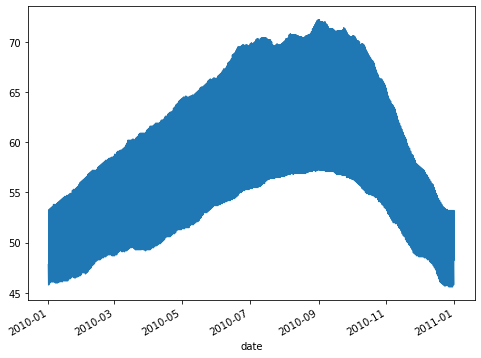

In [6]:
# plot the data to get an overview
df.temp.plot()

<AxesSubplot:xlabel='date'>

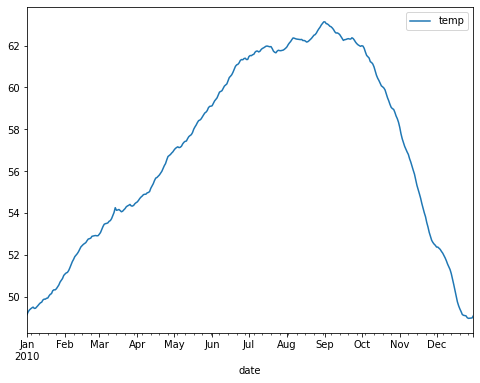

In [7]:
df.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

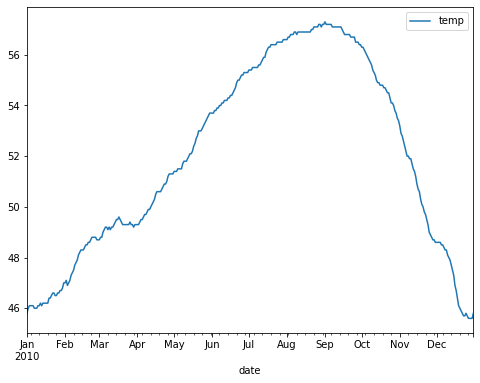

In [8]:
df.resample('D').min().plot()

<AxesSubplot:xlabel='date'>

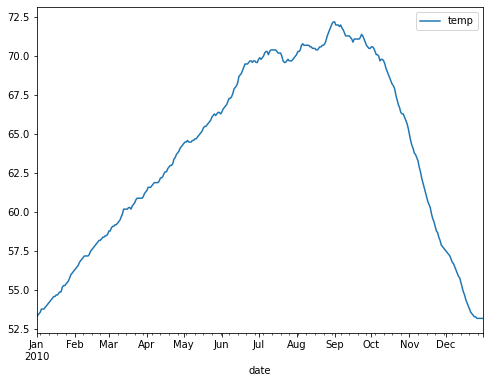

In [9]:
df.resample('D').max().plot()

In [10]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [11]:
# Which month has the highest average temperature?
df.temp.resample('M').mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [12]:
# 6. Resample by the day and calculate the min and max temp for the day 
# (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in
# temperature for the day. Which month has the highest daily temperature variability?

daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


<AxesSubplot:xlabel='date'>

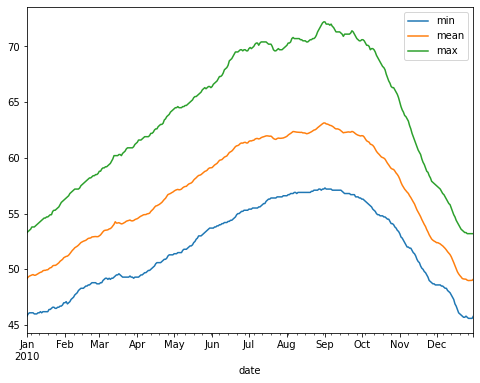

In [13]:
# Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

In [14]:
from vega_datasets import data
df_weather = data.seattle_weather()
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [15]:
# set date as index and sort index

df_weather = df_weather.set_index('date').sort_index()

In [16]:
df_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
# Which year and month combination has the highest amount of precipitation?

df_weather.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

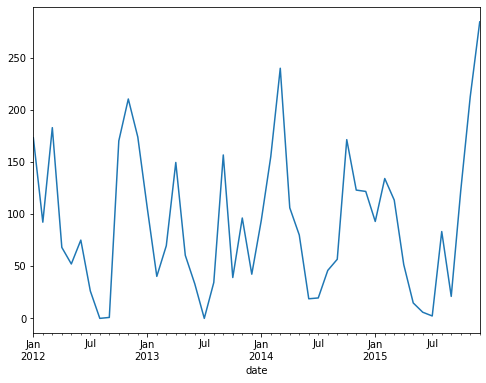

In [18]:
# Visualize the amount of monthly precipitation over time 

df_weather.precipitation.resample('M').sum().plot()

<AxesSubplot:xlabel='date'>

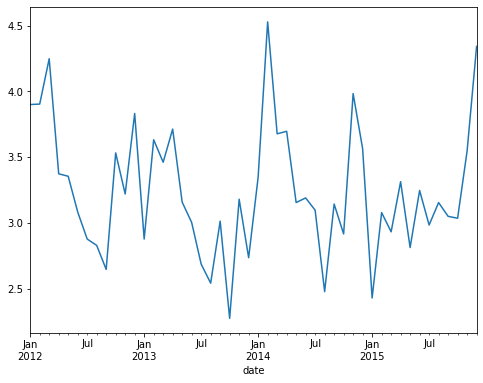

In [19]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

df_weather.wind.resample('M').mean().plot()

In [20]:
# Which year-month combination is the windiest?

df_weather.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

In [21]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

df_weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [22]:
# In which month does it rain the most?

df_weather['month'] = df_weather.index.month

In [23]:
df_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [24]:
df_weather.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

In [25]:
# Which month has the most number of days with a non-zero amount of precipitation?
df_weather['rained'] = df_weather.precipitation > 0

In [26]:
df_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month,rained
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,1,True


In [27]:
df_weather.groupby('month').rained.mean().sort_values().tail(5)

month
1     0.532258
3     0.588710
11    0.591667
2     0.646018
12    0.653226
Name: rained, dtype: float64

In [28]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [30]:
df_flights = data.flights_20k().set_index('date').sort_index()
df_flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [31]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [33]:
# use the function (.apply)

%timeit df_flights.delay = df_flights.delay.apply(delay_to_zero)

4.46 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
# another method (np.where). Much faster if you have large dataset

%timeit df_flights.delay = np.where(df_flights.delay < 0, 0, df_flights.delay)

124 µs ± 512 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [35]:
# Which hour of the day has the highest average delay?

df_flights['hour'] = df_flights.index.hour

df_flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7
